In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

In [2]:
import os as os
os.chdir('/media/shubham/3AA25FBFA25F7DF7/Data Science/big mart')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
train = pd.read_csv('Train_UWu5bXk.csv')

In [50]:
# imputing missing values
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small',inplace=True)
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat'])
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], ['Regular'])

# droping identifiers
train.drop(['Item_Identifier','Outlet_Identifier'], axis=1 , inplace=True)

## creating dummy variables to convert categorical into numeric values
train['Outlet_Establishment_Year'] = train['Outlet_Establishment_Year'].astype('object')
mylist = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix= mylist)
train.drop(mylist, axis=1, inplace = True)
X = pd.concat([train,dummies], axis =1 )

In [52]:
training = X.drop(['Item_Outlet_Sales'], axis =1)

In [54]:
from sklearn.preprocessing import scale

In [55]:
##spliting 
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(training, train['Item_Outlet_Sales'], test_size=0.3)

In [57]:
#converting into numeric values
X = x_train.values
y = x_cv.values

In [58]:
# scaling
X = scale(X)
Y = scale(y)

In [59]:
# importing svd
from sklearn.decomposition import TruncatedSVD

In [76]:
# n_components refers to the dimensionality of output data.
svd = TruncatedSVD(n_components = 39)

In [77]:
# fitting svd model on training data X
svd.fit(X,y_train)

TruncatedSVD(algorithm='randomized', n_components=39, n_iter=5,
       random_state=None, tol=0.0)

In [78]:
# checking variance explained by 39 components
var = svd.explained_variance_ratio_
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([  12.02,   19.24,   25.79,   32.05,   37.83,   42.88,   46.23,
         49.27,   52.21,   55.08,   57.93,   60.7 ,   63.44,   66.17,
         68.89,   71.57,   74.22,   76.85,   79.44,   82.01,   84.56,
         87.1 ,   89.61,   91.93,   94.2 ,   96.39,   98.31,  100.01,
        100.01,  100.01,  100.01,  100.01,  100.01,  100.01,  100.01,
        100.01,  100.01,  100.01,  100.01])

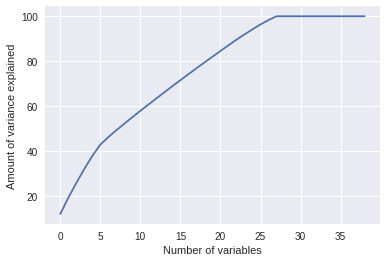

In [80]:
plt.plot(var1)
plt.xlabel('Number of variables')
plt.ylabel('Amount of variance explained')

The plot shows that ~27 components can explain 98.28% of the variance in the data set. Therefore, in simple words, using SVD we have reduced from 40 variables to 27 variables, without much loss in explained variance. Now we can use this 27 variables, and can build our model from this.

In [81]:
# fitting the model with only 27 components
svd = TruncatedSVD(n_components = 27)
svd.fit(X,y_train)

TruncatedSVD(algorithm='randomized', n_components=27, n_iter=5,
       random_state=None, tol=0.0)

In [82]:
X1 = svd.fit_transform(X)

In [83]:
Y1 = svd.transform(Y)

In [84]:
# importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_svd = RandomForestRegressor(n_estimators=100)

Here, I have used random forest regressor, but you can also use different modelling techniques.

In [85]:
# run a random forest model
rf_svd.fit(X1,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [88]:
# calculating score on cross validation dataset
rf_svd.score(Y1,y_cv)

0.54376396615417444